## 2.3 Método do ponto fixo

Muitos problemas em ciências e engenharia envolvem a resolução de uma equação que pode ser colocada na forma $f(x)=0$. Em alguns casos a solução exata $\overline{x}$ pode ser encontrada por processos analíticos, quando isso não for possível, uma solução aproximada pode ser obtida por métodos numéricos. 

Em geral, a solução numérica é obtida por meio de um processo iterativo que gera uma sequência de soluções aproximadas $x_i$, $i=1,2,3,...$ a partir de uma aproximação inicial $x_0$. Se os valores obtidos se aproximam cada vez mais da solução exata $\overline{x}$, ou seja, $|\overline{x} -x_i| \rightarrow 0$ quando $i\rightarrow \infty$, dizemos que a sequência está convergindo para a solução exata.

O Método das aproximações sucessivas, ou método do ponto fixo, consiste em reescrever a equação $f(x)=0 $ em uma equação equivalente $x = \phi (x)$ em que $\phi (x)$ é a chamada função de iteração. A raiz $\overline{x}$ procurada é obtida por meio de uma sequência de de soluções aproximadas, geradas pelo processo iterativo dado por

$$ x_{i+1} = \phi(x_i) , \,\,\,\,\, i = 0,1,2,...$$

Existem muitas formas diferentes de se obter a função de iteração, como é mostrado nos exemplos a seguir.

**Exemplo 2.3.1:**
Seja a equação $f(x) = x^2-5x=0$, então, algumas possíveis funções de iteração são

(a) $x_{i+1} = \phi(x_i) = \sqrt{5x_i}$

(b) $x_{i+1} = \phi(x_i) = \frac{x_i^2}{5}$

(c) $x_{i+1} = \phi(x_i) = x^2 - 4$


**Exemplo 2.3.2:**
Seja a equação $f(x) = x^3-x-7=0$, então, algumas possíveis funções de iteração são:

(a) $x_{i+1} = \phi(x_i) = x_{i}^3-7$

(b) $x_{i+1} = \phi(x_i) = \sqrt[3]{x+7}$

(c) $x_{i+1} = \phi(x_i) = 7/(x^2-1)$

De modo geral, sempre é possível obter uma função de iteração multiplicando uma função qualquer $\theta(x)$ pela equação $f(x)=0$ e somando $x$ a ambos os lados obtendo-se 

$$x_{i+1} = \phi(x_i) = f(x)\theta(x_i)+x$$

O processo iterativo gera uma sequência de soluções aproximadas a partir de uma solução inicial ("chute" inicial) $x_0$, como é mostrado abaixo

$$x_{1} = \phi(x_0)$$

$$x_{2} = \phi(x_1)$$

$$x_{3} = \phi(x_2)$$

$$\vdots$$

$$x_{n} = \phi(x_{n-1})\simeq \overline{x}$$

Geometricamente, interpretamos o processo iterativo como é mostrado nas figuras abaixo, para dois casos distintos. O ponto de intersecção entre o gráfico de $\phi(x)$ e a reta $y=x$ é o ponto cuja abcissa é a raix procurada $\overline{x}$.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/2_ZEROS_DE_FUNCOES/imagens/ponto_fixo_convergente.png" width="600">
<p style="text-align:center"> Figura 2.3.1 - Método do ponto fixo convergindo para a raiz </p>


**Convergência:**
Seja $\phi(x)$ uma função contínua e derivável em $I=[a,b]$ centrado em $\overline{x}$, então, se $|\phi'(x)|<1$ em $I$, a sequência ${x_k}$, $k=0,1,2,3,..$ querada por $x_{k+1}=\phi(x_k)$ converge para a raiz $\overline{x}$ procurada.

No caso do processo iterativo gerar sequências divergentes, uma interpretação geométrica é mostrada na figura a seguir. 

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/2_ZEROS_DE_FUNCOES/imagens/ponto_fixo_divergente.png" width="600">
<p style="text-align:center"> Figura 2.3.2 - Método do ponto fixo divergindo da raiz. </p>

**Exemplo 2.3.3:**
Encontre uma raiz para $f(x)=x-cosx$ com $\epsilon = 0.01$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,3]

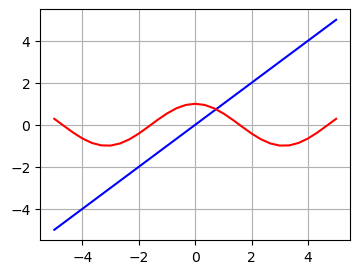

In [2]:
f1 = lambda x: x
f2 = lambda x: np.cos(x)
X = np.linspace(-5, 5, 31)
plt.plot(X, f1(X), "b-", X, f2(X), "r-") 
plt.grid()
plt.show()

In [3]:
from math import cos
phi = lambda x: cos(x)
x0 = 0.7
eps = 0.01

# Inicializando as variáveis
err = 10.0
x_ant = x0
i = 0

while err>eps:
    x = phi(x_ant)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    i=i+1
    print (i, "| x=%.9f"%x, "| err=%.9f"%err)

1 | x=0.764842187 | err=0.084778518
2 | x=0.721491640 | err=0.060084615
3 | x=0.750821329 | err=0.039063474
4 | x=0.731128773 | err=0.026934457
5 | x=0.744421184 | err=0.017856035
6 | x=0.735480200 | err=0.012156661
7 | x=0.741508652 | err=0.008129981


**Exemplo 2.3.4:**
Encontrar a menor raíz positiva de $ f(x)=2x-\tan(x)$ com $\epsilon < 0.01$.

_Solução:_ Inicialmente precisamos localizar a menor raiz positiva da função. Sabemos que há uma raíz em $x=0$ e a outra é próxima de $\pi/2$. Para conseguir uma boa aproximação inicial, fazemos algumas contas e gráfico:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

for x in np.linspace(0,np.pi,10):
    print ("f(",x,")=", 2*x-np.tan(x))

f( 0.0 )= 0.0
f( 0.3490658503988659 )= 0.33416146653152945
f( 0.6981317007977318 )= 0.5571637704181837
f( 1.0471975511965976 )= 0.3623442948243185
f( 1.3962634015954636 )= -2.8787550164267794
f( 1.7453292519943295 )= 9.16194032360637
f( 2.0943951023931953 )= 5.920841012355269
f( 2.443460952792061 )= 5.726021536761403
f( 2.792526803190927 )= 5.9490238406480564
f( 3.141592653589793 )= 6.283185307179586


Na tabela acima para valores da função entre 0 e $\pi$, já vemos que a menor raíz positiva está entre 1.04 e 1.39. Embora possa parecer qu existe outa raiz entre 1.39 e 1.75, essa é uma conclusão erradapois a função não é contínua em $x = \pi/2$. Fazendo o gráfico de $f_1(x)=2x$ e $f_2(x)=tan(x)$ podemos ter uma ideia melhor da localização dessa raiz e concluir que ela está próxima de $x=1.2$.

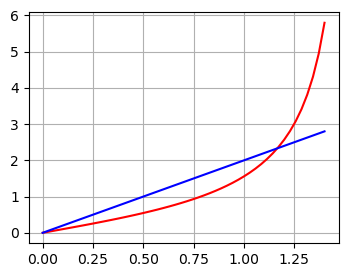

In [5]:
X = np.linspace(0,1.4,50)
plt.plot(X, np.tan(X),"r",X, 2*X,"b") 
plt.grid()
plt.show()


Usando o método do ponto fixo, a primeira função de iteração que imediatamente imaginamos é $\phi(x)=\tan(x)/2$. Mas nesse caso o método converge apenas para a raiz nula já que $|\phi'(x)|=|\tan(x)/2|$ é maior que 1 para valores próximos de $x=1.2$ como podemos ver abaixo.

In [6]:
for x in np.linspace(0.8,1.2,6):
    print ('x =',x, "phi' =",  2-(1/(cos(x))**2 ))

x = 0.8 phi' = -0.06015555816475615
x = 0.88 phi' = -0.4632872860442183
x = 0.96 phi' = -1.0402051218775918
x = 1.04 phi' = -1.9023027471028362
x = 1.12 phi' = -3.268171142025814
x = 1.2 phi' = -5.615963967207052


Assim precisamos de uma outra função de iteração, talvez $\phi(x) = \tan^{-1}(2x)$. Podemos testar fazendo algumas iterações e verificando que está se aproximando de um valor fixo próximo de $x=1.2$.

In [7]:
x = 1.0
for i in range(7):
    x = np.arctan(2*x)
    print (x)

1.1071487177940904
1.1466039045135867
1.1595864584933437
1.1636959143671342
1.1649805955397388
1.165380637446075
1.16550505598934


Lembrando que $\frac{d}{dx}(tan^{-1})=\frac{1}{1+x^2}$ fica fácil verificar a convergência.

A seguir a mesma equação resolvida pelo Método de Newton-Raphson, que é assunto da próxima seção.

In [8]:
from math import tan, cos
x = 1.16
for i in range(5):
    #x = tan(x)/2
    x = x-(2*x-tan(x))/(2-(1/(cos(x))**2))
    print (x, 2*x-tan(x))

1.1656668721422732 -0.00046879734426985564
1.1655612229823151 -1.6749979936392378e-07
1.165561185207216 -2.1316282072803006e-14
1.1655611852072112 4.440892098500626e-16
1.1655611852072112 4.440892098500626e-16


### Exercícios

**1.** Encontre uma aproximação inicial e utilize o método do ponto fixo para as raízes das equações a seguir, se possível, com precisão de $10^{-5}$.

a) $f(x)=3x-e^x=0$

b) $f(x)=\operatorname{sen}(x)+x^2+1=0$

c) $f(x)=\operatorname{sen}(x)-x+2=0$

d) $f(x)=2 x-\operatorname{tg}(x)=0$

i) $f(x)=3 x-\cos (x)+1=0$

j) $f(x)=\ln (x)-\operatorname{sen}(x)=0$

**2.** Utilize o método do ponto fixo para encontrar soluções com precisão de $10^{-5}$, se possível, para os problemas a seguir (Fonte: [Burden et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/98)):

a) $e^x+2^{-x}+2 \cos x-6=0$

b) $\ln (x-1)+\cos (x-1)=0$

c) $2 x \cos 2 x-(x-2)^2=0$

d) $(x-2)^2-\ln x=0$

e) $e^x-3 x^2=0$

f) $\operatorname{sen} x-e^{-x}=0$

g) $x^3+3 x^2-1=0$

h) $x^3-2 x^2-5=0$

i) $x-0,8-0,2 \operatorname{sen} x=0$
